# Drosophila Example - PCA on gene interaction graph

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import shapely.geometry as sg
import descartes
from cycler import cycler

In [2]:
#DeEnModule imports
import deenmodule as dem
from deenmodule.datasets import load_drosophila_pca

In [3]:
# Load PCA DataFrames
df_pca, df_s = load_drosophila_pca()

In [4]:
display(df_pca)
display(df_s)

,gene,1c,2c,3c,4c,5c,6c,7c,8c,9c,10c,11c,12c,13c,14c,15c
FBgn0021872,Xbp1,-0.688122,-0.187913,-0.029932,-0.364234,-0.111763,-0.151290,0.034123,-0.222311,-0.277388,-0.084966,0.046518,0.290070,-0.003595,-0.330638,-0.770584
FBgn0034915,eIF6,5.802965,-0.124591,0.455024,-1.640553,0.612429,-0.524529,0.077749,2.510353,0.092230,-0.061748,0.144981,-0.068694,0.583617,0.127238,-0.336732
FBgn0051710,CG31710,-0.711759,-0.230509,0.178453,-0.344234,-0.131627,-0.073657,-0.145479,-0.060234,-0.119465,-0.023524,-0.189979,-0.159719,-0.026956,0.036481,-0.016868
FBgn0015288,RpL22,10.569294,0.207348,-0.195174,-1.992099,1.067980,0.187109,0.004879,-1.714385,-0.050466,-0.110949,-0.080892,-0.378208,-1.042504,0.231465,0.283234
FBgn0031306,CG4577,-0.759188,-0.313915,0.057296,-0.374088,-0.138612,-0.055708,-0.151408,-0.092845,-0.124016,-0.036597,-0.191442,-0.161745,0.001533,0.029277,0.022809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBgn0036519,CG7650,-0.555661,-0.085686,-0.148371,-0.348637,-0.086380,-0.254934,-0.156864,-0.094273,-0.151807,0.052181,-0.291352,-0.049948,-0.163369,-0.104884,-0.397634
FBgn0029849,Efr,-0.759660,-0.314109,0.055191,-0.372456,-0.137439,-0.063673,-0.148242,-0.095969,-0.128694,-0.048545,-0.187557,-0.145654,0.000673,0.013127,0.029041
FBgn0034000,CG11808,8.598615,0.227309,0.331876,-1.383800,0.646355,0.008373,0.049758,-0.614092,-0.007668,-0.099481,0.064463,-0.211175,1.406960,0.176457,0.217995
FBgn0035397,CG11486,-0.411067,-0.174564,0.152713,-0.570083,0.013281,-0.068465,-0.139239,-0.186025,-0.135761,-0.069418,-0.209045,-0.221571,-0.308818,0.068603,-0.154341


,explained_variance_ratio
1,2.006152e-01
2,6.190699e-02
3,5.702514e-02
4,4.756113e-02
5,4.192007e-02
...,...
3306,1.012293e-33
3307,1.012293e-33
3308,1.012293e-33
3309,1.012293e-33


In [5]:
# Calculates DeEn (this takes a little while)
df_en, df_dec = dem.DeEnModule(df_pca)

In [6]:
display(df_en)
display(df_dec)

,dim,radius-start,radius-end,entropy,entropy-norm,entropy-norm-smooth,radius-rank,entropy-rank,rank-sum,circle-rank
0,1,0.0,1.0,1.888177,0.417409,0.417409,1.0,24.0,25.0,NaN
1,1,0.1,1.1,1.927742,0.426156,0.426156,2.0,30.0,32.0,NaN
2,1,0.2,1.2,1.924603,0.425462,0.425462,3.0,28.0,31.0,NaN
3,1,0.3,1.3,1.917073,0.423797,0.423797,4.0,27.0,31.0,NaN
4,1,0.4,1.4,1.930517,0.426769,0.426769,5.0,31.0,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...
55,9,5.5,6.5,1.000000,0.221065,0.221065,56.0,1.0,57.0,NaN
56,9,5.6,6.6,NaN,NaN,0.221065,57.0,NaN,NaN,NaN
57,9,5.7,6.7,NaN,NaN,0.221065,58.0,NaN,NaN,NaN
58,9,5.8,6.8,NaN,NaN,0.221065,59.0,NaN,NaN,NaN


,gene,1c,2c,3c,4c,5c,6c,7c,8c,9c,10c,11c,12c,13c,14c,15c,1c-2c-dist,1c-2c-angle,2c-3c-dist,2c-3c-angle,3c-4c-dist,3c-4c-angle,4c-5c-dist,4c-5c-angle,5c-6c-dist,5c-6c-angle,6c-7c-dist,6c-7c-angle,7c-8c-dist,7c-8c-angle,8c-9c-dist,8c-9c-angle,9c-10c-dist,9c-10c-angle
FBgn0030786,mRpL22,8.688977,-3.201747,0.061535,3.743979,-3.036896,0.141859,0.153848,-0.364004,0.006346,0.000228,0.130987,-0.025016,1.868156,0.196551,0.221356,9.260103,-20.228024,3.202338,178.898950,3.744484,89.058381,4.820800,-39.046941,3.040208,177.325550,0.209268,47.321604,0.395181,-67.088441,0.364059,179.001143,0.006351,2.059385
FBgn0064225,RpL5,11.751218,-0.134340,-0.322145,-0.830750,0.466349,-0.148701,-0.059558,-0.401490,0.006326,0.007832,-0.069524,0.247579,-1.956518,-0.201823,-0.110842,11.751986,-0.654978,0.349034,-112.637002,0.891024,-111.195093,0.952695,150.691965,0.489482,-17.685513,0.160185,-158.172767,0.405884,-98.437870,0.401540,179.097261,0.010068,51.071677
FBgn0261381,mtTFB1,0.635948,-0.539792,0.243300,-0.280878,-0.153004,-0.235479,-0.068365,1.775988,-0.006002,0.008623,-0.034070,0.060191,0.230880,-0.057628,-0.023452,0.834149,-40.324543,0.592089,155.737494,0.371601,-49.100497,0.319848,-151.421408,0.280821,-123.013946,0.245203,-163.810701,1.777303,92.204473,1.775998,-0.193621,0.010506,124.839048
FBgn0038471,CG5220,-0.233772,-0.254038,0.278637,-0.675373,-0.016219,-0.273185,-0.087074,1.888951,-0.010952,0.008508,-0.053744,-0.038923,-0.328463,0.000906,-0.027226,0.345232,-132.621043,0.377060,132.356001,0.730593,-67.580538,0.675567,-178.624341,0.273666,-93.397597,0.286726,-162.320919,1.890957,92.639281,1.888983,-0.332197,0.013869,142.157968
FBgn0039359,RpL27,11.051519,0.413505,-0.174558,-2.041035,1.374274,-0.062774,-0.035089,-1.045915,-0.018923,0.006749,-0.088989,-0.325181,-1.678027,0.208874,-0.020133,11.059253,2.142787,0.448840,-22.886669,2.048486,-94.888284,2.460580,146.046750,1.375707,-2.615343,0.071916,-150.795854,1.046503,-91.921489,1.046086,-178.963505,0.020091,160.369554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBgn0036422,CG3868,-0.870848,-0.504462,0.049368,-0.634562,-0.307632,-0.353481,-0.460239,-0.624096,6.128721,0.508767,0.983782,0.305461,0.003442,-0.166247,-0.074462,1.006408,-149.917290,0.506872,174.410734,0.636480,-85.551480,0.705200,-154.136204,0.468600,-131.032751,0.580318,-127.525633,0.775445,-126.406932,6.160415,95.814460,6.149802,4.745445
FBgn0020508,Ag5r2,-0.869457,-0.520320,0.048025,-0.594704,-0.248634,-0.351684,-0.462861,-0.622559,6.206925,0.511869,1.006877,0.312112,0.004142,-0.204044,-0.065753,1.013256,-149.101924,0.522531,174.726645,0.596640,-85.383173,0.644587,-157.311205,0.430698,-125.259520,0.581311,-127.227774,0.775770,-126.630132,6.238069,95.727647,6.227996,4.714364
FBgn0032144,CG17633,-0.873306,-0.510032,0.050293,-0.643939,-0.317286,-0.367259,-0.479048,-0.644280,6.419497,0.529671,1.040963,0.298953,0.003397,-0.230734,-0.078475,1.011334,-149.714053,0.512505,174.368457,0.645900,-85.534185,0.717864,-153.769294,0.485335,-130.824722,0.603628,-127.475319,0.802860,-126.632313,6.451747,95.731183,6.441312,4.716776
FBgn0259998,CG17571,-0.876228,-0.513354,0.051142,-0.656588,-0.332978,-0.375686,-0.488707,-0.659268,6.600790,0.550083,1.074236,0.286904,0.002802,-0.242538,-0.096332,1.015534,-149.635326,0.515895,174.310812,0.658577,-85.546219,0.736195,-153.108905,0.502010,-131.551216,0.616421,-127.550703,0.820651,-126.549109,6.633631,95.703620,6.623671,4.763786


## Explained variance ratio

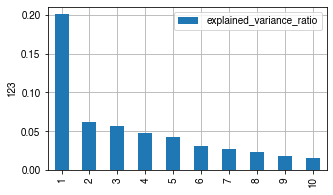

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
#
df_s.iloc[:10].plot(kind='bar', ax=ax, zorder=3)
ax.set_ylabel("123")
ax.grid(zorder=1)

## 

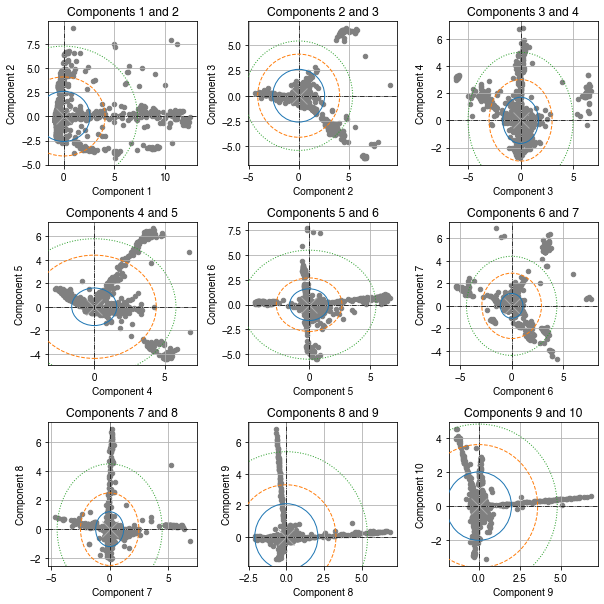

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8.5,8.5))
cyc = (cycler(edgecolor=['#1f77b4', '#ff7f0e', '#2ca02c']) + cycler(linestyle=['solid', 'dashed', 'dotted']))()
for dim, ax in zip(range(1,10), axes.flatten()):
    xdim = '{dim:d}c'.format(dim=dim)
    ydim = '{dim:d}c'.format(dim=(dim + 1))
    #
    ax.plot(0, 0, color='darkgray', marker='x', ms=16)
    #
    ax.axhline(y=0, c='black', lw=0.75, ls='-.', zorder=2)
    ax.axvline(x=0, c='black', lw=0.75, ls='-.', zorder=2)
    #
    df_pca.plot(x=xdim, y=ydim, c='gray', kind='scatter', ax=ax, rasterized=True)
    #
    ax.set_title('Components {xdim} and {ydim}'.format(xdim=dim, ydim=dim + 1))
    ax.set_xlabel('Component {xdim:d}'.format(xdim=dim))
    ax.set_ylabel('Component {ydim:d}'.format(ydim=dim + 1))
    #
    # Radius Circles
    df_en_tmp = df_en.loc[((df_en['dim'] == dim) & (df_en['circle-rank'].notnull())), :]
    sg_circles = {}
    for idx, cut_rank, radius in df_en_tmp[['circle-rank','radius-start']].to_records():
        # Shapely Circle
        #sg_circle = sg.Point(0, 0).buffer(radius)
        #sg_circles[cut_rank] = sg_circle
        # Matplotlib Circle
        props = next(cyc)
        mpl_circle = mp.Circle((0, 0), radius=radius, facecolor='none', zorder=6, **props)
        ax.add_patch(mpl_circle)

    #
    ax.grid(zorder=1)
plt.tight_layout()